In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [14]:
covid_df = pd.read_csv('covid_df__top_10.csv')
covid_df

,STATE,PROVINCE_STATE_NAME,Date,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_65Plus,Series_Complete_Yes,...,AGE7579_MALE,AGE7579_FEM,AGE8084_TOT,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,GDP_current_dollar,personal_income
0,6,California,2020-01-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,456084,562278,678034,288991,389043,734888,264300,470588,3068809392,3592144
1,6,California,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,456084,562278,678034,288991,389043,734888,264300,470588,3068809392,3592144
2,6,California,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,456084,562278,678034,288991,389043,734888,264300,470588,3068809392,3592144
3,6,California,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,456084,562278,678034,288991,389043,734888,264300,470588,3068809392,3592144
4,6,California,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,456084,562278,678034,288991,389043,734888,264300,470588,3068809392,3592144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8295,48,Texas,2022-04-25,25120.6,20890120.0,20884105.0,19864532.0,18040473.0,3628247.0,17587233.0,...,335908,409708,441317,186051,255266,401630,142044,259586,2402137185,14497143
8296,48,Texas,2022-04-26,25120.6,20897363.0,20891339.0,19869792.0,18044864.0,3628950.0,17591452.0,...,335908,409708,441317,186051,255266,401630,142044,259586,2402137185,14497143
8297,48,Texas,2022-04-27,25120.6,20907738.0,20901703.0,19877395.0,18051163.0,3630034.0,17598026.0,...,335908,409708,441317,186051,255266,401630,142044,259586,2402137185,14497143
8298,48,Texas,2022-04-28,25120.6,20914938.0,20908897.0,19883027.0,18056005.0,3631069.0,17603464.0,...,335908,409708,441317,186051,255266,401630,142044,259586,2402137185,14497143


In [3]:
tracable = covid_df.loc[:, ['Completeness_pct', 'Administered_Dose1_Recip', 
                            'Administered_Dose1_Recip_5Plus', 'Administered_Dose1_Recip_12Plus', 
                            'Administered_Dose1_Recip_18Plus', 'Administered_Dose1_Recip_65Plus', 
                            'Series_Complete_Yes', 
                            'Booster_Doses', 
                            'Bivalent_Booster_5Plus', 'PEOPLE_POSITIVE_CASES_COUNT',
                            'PEOPLE_DEATH_NEW_COUNT', 'PEOPLE_POSITIVE_NEW_CASES_COUNT', 'PEOPLE_DEATH_COUNT', 'TOT_POP',
                            'TOT_MALE', 'TOT_FEMALE',  'AGE6569_TOT', 'AGE6569_MALE', 'AGE6569_FEM',
 'AGE7074_TOT', 'AGE7074_MALE', 'AGE7074_FEM', 'AGE7579_TOT',
 'AGE7579_MALE', 'AGE7579_FEM', 'AGE8084_TOT', 'AGE8084_MALE',
 'AGE8084_FEM', 'AGE85PLUS_TOT', 'AGE85PLUS_MALE', 'AGE85PLUS_FEM',
                            'POPESTIMATE', 'POPEST_MALE', 'POPEST_FEM', 'GDP_current_dollar', 'personal_income']]
tracable

,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_65Plus,Series_Complete_Yes,Booster_Doses,Bivalent_Booster_5Plus,PEOPLE_POSITIVE_CASES_COUNT,...,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,POPESTIMATE,POPEST_MALE,POPEST_FEM,GDP_current_dollar,personal_income
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,288991,389043,734888,264300,470588,39501653,19799447,19702206,3068809392,3592144
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,288991,389043,734888,264300,470588,39501653,19799447,19702206,3068809392,3592144
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,288991,389043,734888,264300,470588,39501653,19799447,19702206,3068809392,3592144
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,288991,389043,734888,264300,470588,39501653,19799447,19702206,3068809392,3592144
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,288991,389043,734888,264300,470588,39501653,19799447,19702206,3068809392,3592144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8295,25120.6,20890120.0,20884105.0,19864532.0,18040473.0,3628247.0,17587233.0,6604940.0,0.0,6738996,...,186051,255266,401630,142044,259586,30029572,15019450,15010122,2402137185,14497143
8296,25120.6,20897363.0,20891339.0,19869792.0,18044864.0,3628950.0,17591452.0,6654683.0,0.0,6741552,...,186051,255266,401630,142044,259586,30029572,15019450,15010122,2402137185,14497143
8297,25120.6,20907738.0,20901703.0,19877395.0,18051163.0,3630034.0,17598026.0,6661874.0,0.0,6744065,...,186051,255266,401630,142044,259586,30029572,15019450,15010122,2402137185,14497143
8298,25120.6,20914938.0,20908897.0,19883027.0,18056005.0,3631069.0,17603464.0,6669530.0,0.0,6746780,...,186051,255266,401630,142044,259586,30029572,15019450,15010122,2402137185,14497143


In [4]:
correlation_matrix = tracable.corr()
correlation_matrix

,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_65Plus,Series_Complete_Yes,Booster_Doses,Bivalent_Booster_5Plus,PEOPLE_POSITIVE_CASES_COUNT,...,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,POPESTIMATE,POPEST_MALE,POPEST_FEM,GDP_current_dollar,personal_income
Completeness_pct,1.000000,0.548647,0.430891,0.548261,0.547946,0.554554,0.551126,0.416644,NaN,0.539099,...,-0.082314,-0.082411,-0.122814,-0.114134,-0.127827,-0.065154,-0.065523,-0.064773,0.005655,0.188994
Administered_Dose1_Recip,0.548647,1.000000,0.856126,0.999747,0.999181,0.960841,0.995846,0.860091,NaN,0.875745,...,0.438047,0.448934,0.429713,0.425277,0.431005,0.402032,0.401160,0.402873,0.504783,-0.031750
Administered_Dose1_Recip_5Plus,0.430891,0.856126,1.000000,0.854636,0.855402,0.832273,0.837721,0.944357,NaN,0.924172,...,0.527793,0.545660,0.510608,0.501503,0.514546,0.556357,0.556002,0.556658,0.650209,0.163244
Administered_Dose1_Recip_12Plus,0.548261,0.999747,0.854636,1.000000,0.999734,0.963807,0.995047,0.854478,NaN,0.870622,...,0.439452,0.450129,0.431383,0.427095,0.432578,0.401833,0.400944,0.402692,0.503943,-0.035746
Administered_Dose1_Recip_18Plus,0.547946,0.999181,0.855402,0.999734,1.000000,0.968729,0.993351,0.853437,NaN,0.868356,...,0.441877,0.452149,0.433876,0.429941,0.434841,0.400496,0.399559,0.401403,0.502341,-0.043194
Administered_Dose1_Recip_65Plus,0.554554,0.960841,0.832273,0.963807,0.968729,1.000000,0.946538,0.816770,NaN,0.834822,...,0.456657,0.458182,0.442484,0.447079,0.438075,0.354291,0.352331,0.356239,0.440928,-0.116737
Series_Complete_Yes,0.551126,0.995846,0.837721,0.995047,0.993351,0.946538,1.000000,0.856493,NaN,0.875143,...,0.417826,0.427859,0.407737,0.404203,0.408540,0.382158,0.381372,0.382915,0.482734,-0.024350
Booster_Doses,0.416644,0.860091,0.944357,0.854478,0.853437,0.816770,0.856493,1.000000,NaN,0.940843,...,0.479923,0.495680,0.466799,0.459065,0.470029,0.482728,0.482577,0.482830,0.590759,0.071043
Bivalent_Booster_5Plus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PEOPLE_POSITIVE_CASES_COUNT,0.539099,0.875745,0.924172,0.870622,0.868356,0.834822,0.875143,0.940843,NaN,1.000000,...,0.485244,0.494717,0.448929,0.450092,0.446648,0.489259,0.488133,0.490350,0.569793,0.209110


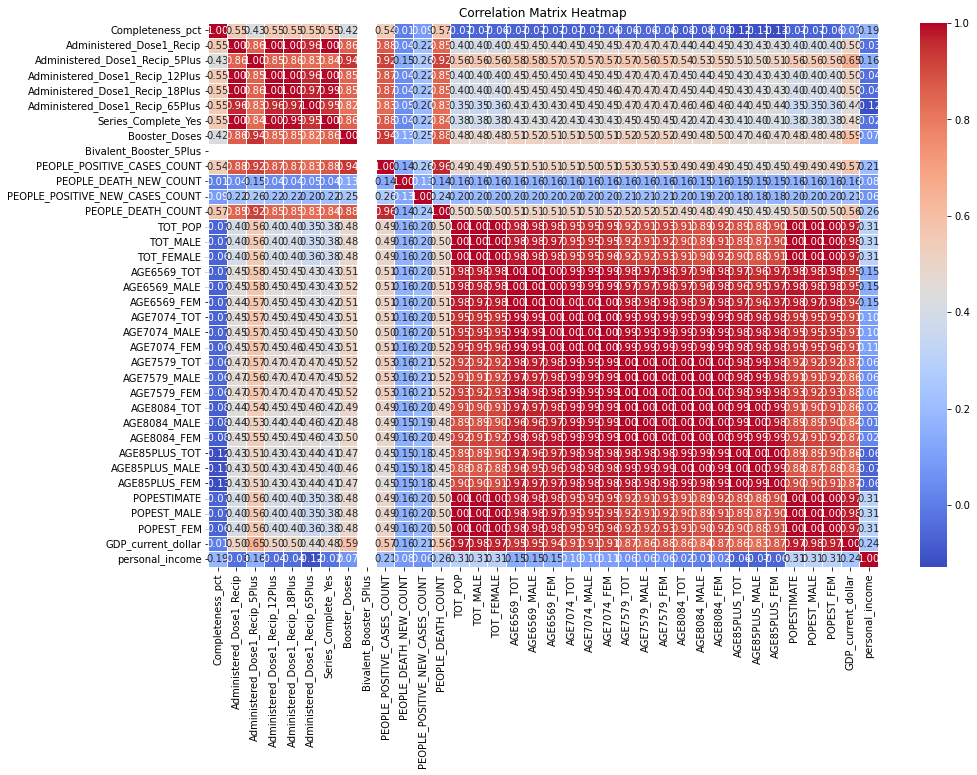

In [5]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [6]:
#Not multi, this is univariate

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

uni_df = covid_df[['Date','PEOPLE_POSITIVE_NEW_CASES_COUNT']].groupby('Date').sum()
uni_df_no_zero = uni_df[uni_df['PEOPLE_POSITIVE_NEW_CASES_COUNT']>0]
decomposition = seasonal_decompose(uni_df_no_zero, model='multiplicative', period=52) 

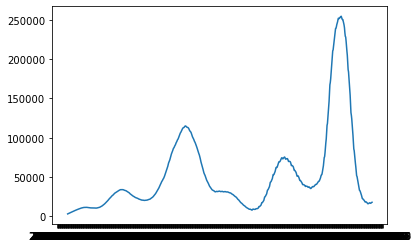

In [8]:
plt.plot(decomposition.trend)

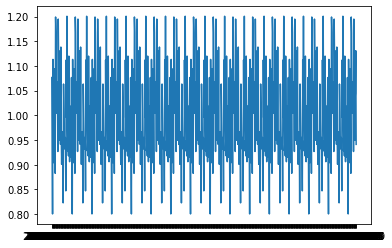

In [9]:
plt.plot(decomposition.seasonal)

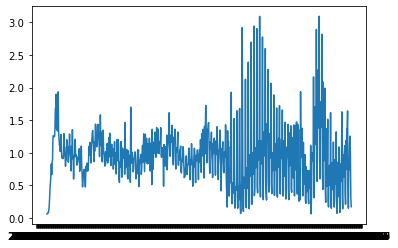

In [10]:
plt.plot(decomposition.resid)

In [11]:
corr_threshold = 0.95

high_corr = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > corr_threshold:
            colname = correlation_matrix.columns[i]
            high_corr.add(colname)

In [12]:
high_corr

{'AGE6569_FEM',
 'AGE6569_MALE',
 'AGE6569_TOT',
 'AGE7074_FEM',
 'AGE7074_MALE',
 'AGE7074_TOT',
 'AGE7579_FEM',
 'AGE7579_MALE',
 'AGE7579_TOT',
 'AGE8084_FEM',
 'AGE8084_MALE',
 'AGE8084_TOT',
 'AGE85PLUS_FEM',
 'AGE85PLUS_MALE',
 'AGE85PLUS_TOT',
 'Administered_Dose1_Recip_12Plus',
 'Administered_Dose1_Recip_18Plus',
 'Administered_Dose1_Recip_65Plus',
 'GDP_current_dollar',
 'PEOPLE_DEATH_COUNT',
 'POPESTIMATE',
 'POPEST_FEM',
 'POPEST_MALE',
 'Series_Complete_Yes',
 'TOT_FEMALE',
 'TOT_MALE'}